In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import autogluon
from autogluon.tabular import TabularPredictor
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

C:\Users\amin2\anaconda3\envs\TeamProject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = 'Dataset.xlsx'
data = pd.read_excel(path)
label = 'Vessels ISR'
data.head()
data.loc[data['Vessels ISR'] > 1, 'Vessels ISR'] = 1

In [3]:
print(data)

     Male  (0 or 1)  Hypertension (0 or 1)  Diabetes (0 or 1)  \
0                 1                      1                  0   
1                 1                      0                  1   
2                 1                      1                  0   
3                 1                      1                  1   
4                 1                      0                  0   
..              ...                    ...                ...   
731               0                      1                  0   
732               1                      0                  0   
733               0                      1                  1   
734               0                      1                  0   
735               1                      1                  0   

     Smoker (0=0, 1=prior, 2=current)  Family History (0 or 1)  \
0                                 1.0                        0   
1                                 0.0                        0   
2                    

In [3]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

predictor = TabularPredictor(label=label,sample_weight='balance_weight')
predictor.fit(train_data)
predictions = predictor.predict(test_data)


No path specified. Models will be saved in: "AutogluonModels\ag-20230614_114717\"
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230614_114717\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    588
Train Data Columns: 40
Label Column: Vessels ISR
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Assigning sam

In [4]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.878378,0.864407,0.050285,0.035572,0.372834,0.050285,0.035572,0.372834,1,True,9
1,ExtraTreesGini,0.878378,0.872881,0.054100,0.026045,0.387803,0.054100,0.026045,0.387803,1,True,8
2,RandomForestEntr,0.878378,0.872881,0.058242,0.033684,0.383799,0.058242,0.033684,0.383799,1,True,6
3,NeuralNetFastAI,0.871622,0.838983,0.017018,0.019641,1.135422,0.017018,0.019641,1.135422,1,True,10
4,RandomForestGini,0.871622,0.881356,0.062894,0.028792,0.479491,0.062894,0.028792,0.479491,1,True,5
5,CatBoost,0.858108,0.872881,0.009486,0.005003,10.337100,0.009486,0.005003,10.337100,1,True,7
6,NeuralNetTorch,0.858108,0.864407,0.035028,0.022286,0.721103,0.035028,0.022286,0.721103,1,True,12
7,KNeighborsDist,0.858108,0.872881,0.035218,0.038912,0.010030,0.035218,0.038912,0.010030,1,True,2
8,KNeighborsUnif,0.851351,0.847458,0.039203,0.110342,1.156250,0.039203,0.110342,1.156250,1,True,1
9,LightGBM,0.824324,0.881356,0.012504,0.000000,0.170261,0.012504,0.000000,0.170261,1,True,4


In [5]:
feature_columns = data.columns.tolist() 
feature_columns.remove(label)
features = data[feature_columns]
correlations = features.corrwith(data[label])
sorted_correlations = correlations.abs().sort_values(ascending=False)
print(sorted_correlations)

Stent Length in SB (mm)                                                          0.205655
POT (0 or 1)                                                                     0.138385
Total number of lesions (with DS>50%)                                            0.115116
de novo (0 or 1)                                                                 0.087402
Smoker (0=0, 1=prior, 2=current)                                                 0.081722
Prior CABG (0 or 1)                                                              0.076263
MEDINA PM (0 or 1)                                                               0.075439
medina 1.1.1                        (0 or 1)                                     0.073299
SYNTAX score                                                                     0.070420
In-stent Restenosis (0 or 1)                                                     0.062826
BIFURCATION LOCATION (1: LAD; 2LCx; 3:RCA; 4: LM)                                0.060178
LV Functio

C:\Users\amin2\AppData\Local\Temp\ipykernel_18832\3790418849.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = features.corrwith(data[label])


In [6]:
predictor.feature_importance(data=train_data)


Computing feature importance via permutation shuffling for 40 features using 588 rows with 5 shuffle sets...
	11.87s	= Expected runtime (2.37s per shuffle set)
	1.54s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
POT (0 or 1),0.067347,0.006760,0.000012,5,0.081266,0.053428
Dedicated Bifurcation QCA (0 or 1),0.015646,0.005563,0.001633,5,0.027101,0.004192
Diabetes (0 or 1),0.015646,0.003687,0.000344,5,0.023238,0.008055
Age at Index Procedure,0.015306,0.002405,0.000071,5,0.020258,0.010354
Pre-MLD in MB (mm),0.013946,0.002217,0.000074,5,0.018511,0.009380
Prior PCI (0 or 1),0.012585,0.002579,0.000200,5,0.017896,0.007274
lesion length in SB (mm),0.009524,0.003089,0.001161,5,0.015885,0.003163
MEDINA SB (0 or 1),0.008503,0.003401,0.002512,5,0.015507,0.001500
BIFURCATION LOCATION (1: LAD; 2LCx; 3:RCA; 4: LM),0.007143,0.003485,0.005082,5,0.014319,-0.000034
SYNTAX score,0.007143,0.002217,0.000985,5,0.011709,0.002577


In [7]:
# predictor.delete_models(models_to_keep='best', dry_run=False) 
# predictor.predict(test_data, model='WeightedEnsemble_L2')
predictor.delete_models(models_to_keep='RandomForestEntr', dry_run=False) 
predictor.predict(test_data)

Deleting model KNeighborsUnif. All files under AutogluonModels\ag-20230614_114717\models\KNeighborsUnif\ will be removed.
Deleting model KNeighborsDist. All files under AutogluonModels\ag-20230614_114717\models\KNeighborsDist\ will be removed.
Deleting model LightGBMXT. All files under AutogluonModels\ag-20230614_114717\models\LightGBMXT\ will be removed.
Deleting model LightGBM. All files under AutogluonModels\ag-20230614_114717\models\LightGBM\ will be removed.
Deleting model RandomForestGini. All files under AutogluonModels\ag-20230614_114717\models\RandomForestGini\ will be removed.
Deleting model CatBoost. All files under AutogluonModels\ag-20230614_114717\models\CatBoost\ will be removed.
Deleting model ExtraTreesGini. All files under AutogluonModels\ag-20230614_114717\models\ExtraTreesGini\ will be removed.
Deleting model ExtraTreesEntr. All files under AutogluonModels\ag-20230614_114717\models\ExtraTreesEntr\ will be removed.
Deleting model NeuralNetFastAI. All files under Auto

669    0
33     0
549    0
199    0
264    0
      ..
70     0
329    0
599    0
259    0
349    0
Name: Vessels ISR, Length: 148, dtype: int64

In [8]:
print([predictor.info()])

[{'path': 'AutogluonModels\\ag-20230614_114717\\', 'label': 'Vessels ISR', 'random_state': 0, 'version': '0.7.0', 'features': ['Male  (0 or 1)', 'Hypertension (0 or 1)', 'Diabetes (0 or 1)', 'Smoker (0=0, 1=prior, 2=current)', 'Family History (0 or 1)', 'Dislipidemia (0 or 1)', 'Prior CABG (0 or 1)', 'Prior PCI (0 or 1)', 'Prior stroke/TIA (0 or 1)', 'LV Function (0=Unknown; 1=EF>50%; 2= EF 30-50%; 3= EF<30%)', 'Age at Index Procedure', 'SYNTAX score', 'Total number of lesions (with DS>50%)', 'BIFURCATION LOCATION (1: LAD; 2LCx; 3:RCA; 4: LM)', 'MEDINA PM (0 or 1)', 'MEDINA DM (0 or 1)', 'MEDINA SB (0 or 1)', 'medina sum', 'medina 1.1.1                        (0 or 1)', 'medina true                 1.1.1 or 1.0.1 or 0.1.1                  (0 or 1)', 'de novo (0 or 1)', 'In-stent Restenosis (0 or 1)', 'CTO         (0 or 1)', 'Calcifications (0 or 1)', 'TIMI MB Pre (0, 1, 2 or 3)', 'TIMI SB Pre (0, 1, 2 or 3)', 'Dedicated Bifurcation QCA (0 or 1)', 'RVD in MB (mm)', 'Pre-MLD in MB (mm)',

In [9]:
y_true = test_data[label]  # true label
y_pred = predictor.predict(test_data)  # predicted label

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[126,   0],
       [ 18,   4]], dtype=int64)

In [11]:
results = predictor.fit_summary()
print(results)

*** Summary of fit() ***
Estimated performance of each model:
              model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForestEntr   0.872881       0.033684  0.383799                0.033684           0.383799            1       True          1
Number of models trained: 1
Types of models trained:
{'RFModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             :  1 | ['Stent Diameter in SB (mm)']
('float', [])                : 21 | ['Smoker (0=0, 1=prior, 2=current)', 'Prior stroke/TIA (0 or 1)', 'LV Function (0=Unknown; 1=EF>50%; 2= EF 30-50%; 3= EF<30%)', 'SYNTAX score', 'Total number of lesions (with DS>50%)', ...]
('int', [])                  :  1 | ['Age at Index Procedure']
('int', ['bool'])            :  8 | ['Male  (0 or 1)', 'Hypertension (0 or 1)', 'Diabetes (0 or 1)', 'Family History (0 or 1)', 

C:\Users\amin2\anaconda3\envs\TeamProject\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [12]:
recall_score(y_true, y_pred, average='weighted')

0.8783783783783784

In [13]:
precision_score(y_true, y_pred, average="weighted")

0.893581081081081

In [14]:
print(recall_score(y_true, y_pred))
print(precision_score(y_true, y_pred))

0.18181818181818182
1.0


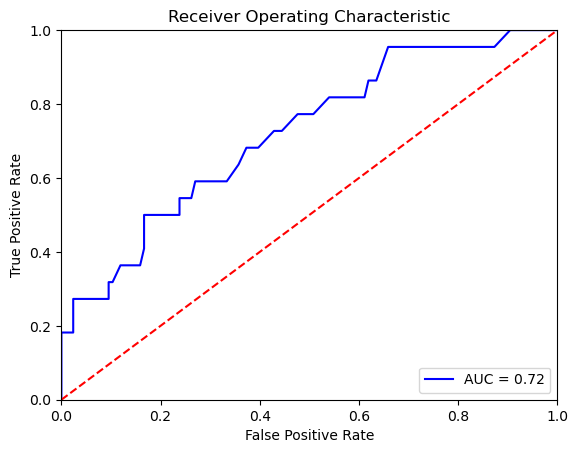

In [15]:
probs = predictor.predict_proba(test_data)
preds = probs[1]
fpr, tpr, threshold = metrics.roc_curve(test_data[label], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
patient_data = test_data.iloc[0]
patient_data = patient_data.drop('Vessels ISR')
lesion_length = patient_data['lesion length in SB (mm)']
patient_data['lesion length in MB (mm)'] = float("nan")
patient_data['Stent Length in MB (mm)'] = float("nan")
patient_data['Stent Diameter in MB (mm)'] = float("nan")
patient_data['Pre-%DS in MB'] = float("nan")
patient_data['Pre-MLD in MB (mm)'] = float("nan")
patient_data['RVD in MB (mm)'] = float("nan")

all_preds = []
all_lengths = []
all_diams = []
acceptable_lengths = []
acceptable_diameters = []
patient_data = patient_data.to_frame().transpose()

for i in np.arange(lesion_length-5, lesion_length+5,0.25):
    patient_data['Stent Length in SB (mm)'] = i
    for j in np.arange(2,5,0.25):
         patient_data['Stent Diameter in SB (mm)'] = j
         probs = predictor.predict_proba(patient_data)
         #get confidence score
         preds = probs[0].item()
         all_preds.append(preds)
         all_lengths.append(i)
         all_diams.append(j)
         

In [90]:
max_confidence = max(all_preds)

best_diams = []
best_lengths = []
indices_best = [i for i, j in enumerate(all_preds) if j == max_confidence]
for i in indices_best:
    best_diams.append(all_diams[i])
    best_lengths.append(all_lengths[i])

# print(acceptable_lengths[0])
# print(acceptable_lengths[0][2])
# for i in range(0,len(acceptable_lengths)-1):
#     if(acceptable_lengths[i][2] != max_confidence):
#         best_lengths.append((acceptable_lengths[i]))

In [94]:
print("The recommended stent length is ",min(best_lengths),'<= x <=', max(best_lengths))
print("The recommended stent diameter is",min(best_diams), '<= x <=',max(best_diams))
print("The confidence score is", round(max_confidence*100,2),"%")

The recommended stent length is  14.2 <= x <= 14.95
The recommended stent diameter is 3.25 <= x <= 3.25
The confidence score is 70.67 %
